In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import GRU

In [2]:
# Load dataset
file_path = 'dataset_final_preprocess_2.csv'  # Ganti dengan path dataset Anda
data = pd.read_csv(file_path)

data.head(5)

,Unnamed: 0,No,Text,Label,tokens,tokens_fdist,normalized,tokens_stemmed
0,0,1,baru saja kenalan sama orang baru di kafe dan ...,1,"['baru', 'saja', 'kenalan', 'sama', 'orang', '...","['kenalan', 'orang', 'kafe', 'seru', 'banget',...","['baru', 'saja', 'kenalan', 'sama', 'orang', '...","['baru', 'saja', 'kenal', 'sama', 'orang', 'ba..."
1,1,2,gak bisa diem di rumah nih pengen banget jalan...,1,"['gak', 'bisa', 'diem', 'di', 'rumah', 'nih', ...","['diem', 'rumah', 'pengen', 'banget', 'jalanja...","['tidak', 'bisa', 'diem', 'di', 'rumah', 'nih'...","['tidak', 'bisa', 'diem', 'di', 'rumah', 'nih'..."
2,2,3,ngecash energi dengan ketemu orang kantor nih ...,1,"['ngecash', 'energi', 'dengan', 'ketemu', 'ora...","['ngecash', 'energi', 'ketemu', 'orang', 'kant...","['ngecash', 'energi', 'dengan', 'ketemu', 'ora...","['ngecash', 'energi', 'dengan', 'ketemu', 'ora..."
3,3,4,hari ini sibuk banget tapi seneng karena bisa ...,1,"['hari', 'ini', 'sibuk', 'banget', 'tapi', 'se...","['sibuk', 'banget', 'seneng', 'ketemu', 'orang...","['hari', 'ini', 'sibuk', 'banget', 'tetapi', '...","['hari', 'ini', 'sibuk', 'banget', 'tetapi', '..."
4,4,5,pesta di rumah tetangga bikin hari jadi gaul b...,1,"['pesta', 'di', 'rumah', 'tetangga', 'bikin', ...","['pesta', 'rumah', 'tetangga', 'gaul', 'banget...","['pesta', 'di', 'rumah', 'tetangga', 'bikin', ...","['pesta', 'di', 'rumah', 'tetangga', 'bikin', ..."


In [3]:
X = data['tokens_stemmed']
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
EMBEDDING_SIZE = 100
MAXLEN = 50
TRUNCATING = 'post'
PADDING = 'pre'
OOV_TOKEN = "<OOV>"
MAX_EXAMPLES = 160000

In [5]:
# Buat tokenizer dan sesuaikan dengan X_train
tokenizer = Tokenizer(oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)

In [6]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding, truncating and maxlen
    pad_trunc_sequences = pad_sequences(sequences, maxlen=maxlen, padding=PADDING, truncating=truncating)
    
    ### END CODE HERE
    
    return pad_trunc_sequences

In [ ]:
train_pad_trunc_seq = seq_pad_and_trunc(X_train, tokenizer, PADDING, TRUNCATING, MAXLEN)
val_pad_trunc_seq = seq_pad_and_trunc(X_test, tokenizer, PADDING, TRUNCATING, MAXLEN)

print(f"Padded and truncated training sequences have shape: {train_pad_trunc_seq.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_trunc_seq.shape}")

Using GRU Algorithm

In [11]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# Add 1 to the labels to shift them to the correct range
y_train += 1
y_test += 1

# GRU Model
gru_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=MAXLEN),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(5, activation='softmax')
])

gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
history = gru_model.fit(train_pad_trunc_seq, y_train, epochs=10, validation_data=(val_pad_trunc_seq, y_test), batch_size=32)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2963 - loss: 1.5898 - val_accuracy: 0.4784 - val_loss: 1.3079
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6149 - loss: 0.9746 - val_accuracy: 0.6883 - val_loss: 0.9084
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8820 - loss: 0.4166 - val_accuracy: 0.7284 - val_loss: 0.8686
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9745 - loss: 0.1456 - val_accuracy: 0.7315 - val_loss: 0.9141
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9926 - loss: 0.0734 - val_accuracy: 0.7346 - val_loss: 0.9872
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9941 - loss: 0.0319 - val_accuracy: 0.7407 - val_loss: 1.0138
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9959 - loss: 0.0249 - val_accuracy: 0.7315 - val_loss: 1.1119
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9981 - loss: 0.0167 - val_accuracy: 0.7500 - v

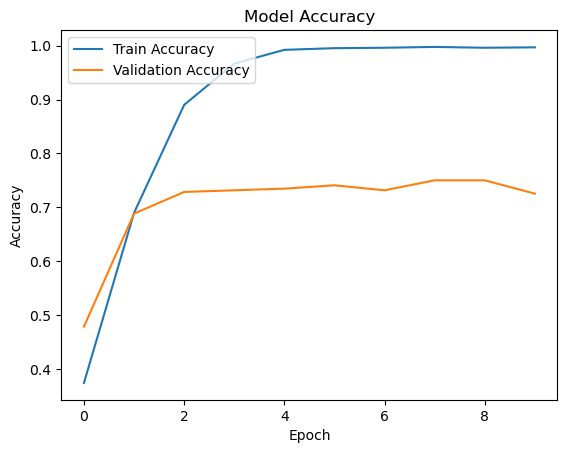

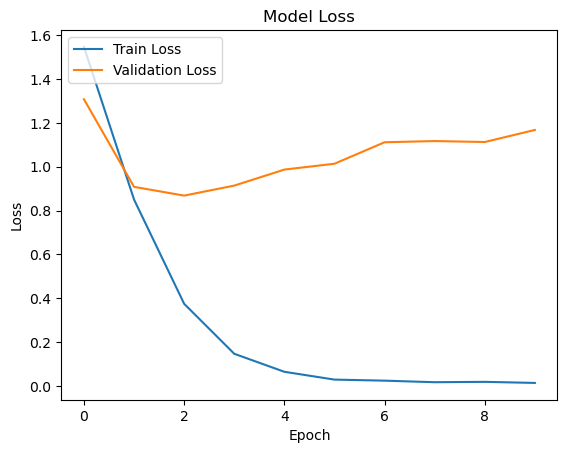

In [12]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()